In [ ]:
'''
 * Copyright (c) 2008 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

# Markov Chains

> Leaphorn never counted on luck. Instead, he expected order—the natural sequence of behavior, the cause producing the natural effect, the human behaving in the way it was natural for him to behave. He counted on that and on his own ability to sort out the chaos of observed facts and find in them this natural order.  
> *—Tony Hillerman, The Blessing Way*

---

In this chapter, we introduce fundamental notions of Markov chains and state the results that are needed to establish the convergence of various MCMC algorithms and, more generally, to understand the literature on this topic. Thus, this chapter, along with basic notions of probability theory, will provide enough foundation for understanding the following chapters. 

It is, unfortunately, a necessarily brief and, therefore, incomplete introduction to Markov chains. For a thorough introduction, we refer the reader to **Meyn and Tweedie (1993)**, on which this chapter is based. Other perspectives can be found in:

- **Doob (1953)**  
- **Chung (1960)**  
- **Feller (1970, 1971)**  
- **Billingsley (1995)**  

These works provide general treatments of Markov chains. Additionally, for books entirely dedicated to Markov chains, consider:

- **Norris (1997)**  
- **Nummelin (1984)**  
- **Revuz (1984)**  
- **Resnick (1994)**  

Given the purely utilitarian goal of this chapter, its style and presentation differ from those of other chapters. This chapter is characterized by:

1. A plethora of definitions and theorems.  
2. A rarity of examples and proofs.  

To make the book accessible to those who are more interested in the implementation aspects of MCMC algorithms than in their theoretical foundations, we include a preliminary section that contains the essential facts about Markov chains.

---

### Continuous-Time Markov Models

Before formally introducing the notion of a Markov chain, note that we do not deal in this chapter with **Markov models in continuous time**.

## Markov Processes and Essentials for MCMC

Markov processes (sometimes referred to as continuous-time Markov chains) are not discussed in this chapter, as the nature of simulation primarily deals with discrete-time stochastic processes, denoted as $ (X_n)_{n \in \mathbb{N}} $. This restriction arises because:

- The use of pseudo-random number generators.
- The representation of numbers in a computer.

Thus, Markov chains associated with Markov chain Monte Carlo (MCMC) methods are, in practice, finite state-space Markov chains.

However, arbitrary state-space Markov chains are considered to allow for continuous support distributions, avoiding the need to approximate these distributions with discrete support. Such approximations depend heavily on the specific material and algorithmic implementation of a given technique. For further discussion on the effects of discretization on Markov chain convergence, refer to Roberts et al. (1995).

## Essentials for MCMC

This section provides a brief survey of essential properties of Markov chains, laying the foundation for the study of MCMC methods. In Section 6.2, the theory of Markov chains is developed from first principles.

### Transition Kernels in MCMC

In MCMC algorithms, Markov chains are constructed using a **transition kernel**, $ K $. Formally, a transition kernel is a conditional probability density such that:

$$
X_{n+1} \sim K(X_n, X_{n+1})
$$

### Random Walk Process

A typical example of a Markov process is the **random walk**, defined as follows:

**Definition 6.1**  
A sequence of random variables $ (X_n) $ is a random walk if it satisfies:

$$
X_{n+1} = X_n + \epsilon_n
$$

where $ \epsilon_n $ is generated independently of $ X_n, X_{n-1}, \dots $. If the distribution of $ \epsilon_n $ is symmetric about zero, the sequence is called a **symmetric random walk**.

Random walks are critical in many MCMC algorithms, particularly those based on the Metropolis-Hastings algorithm (see Chapter 7).

### Stationary Distributions

Markov chains in MCMC enjoy a strong stability property: a stationary probability distribution exists by construction.

**Definition 6.35**  
A **stationary distribution** is a probability distribution $ \pi $ such that:

$$
X_n \sim \pi \implies X_{n+1} \sim \pi
$$

if the kernel $ K $ allows free movement across the state space. This property of freedom is referred to as **irreducibility** in Markov chain theory.

### Diffusion Representation in MCMC

Some MCMC algorithms incorporate a diffusion representation to speed up convergence to the stationary distribution. For examples of such methods, see Section 7.8.5 or refer to Roberts and Tweedie (1995) or Phillips and Smith (1996).

---

For additional examples and detailed theory on random walks, see Examples 6.39, 6.40, and 6.73.


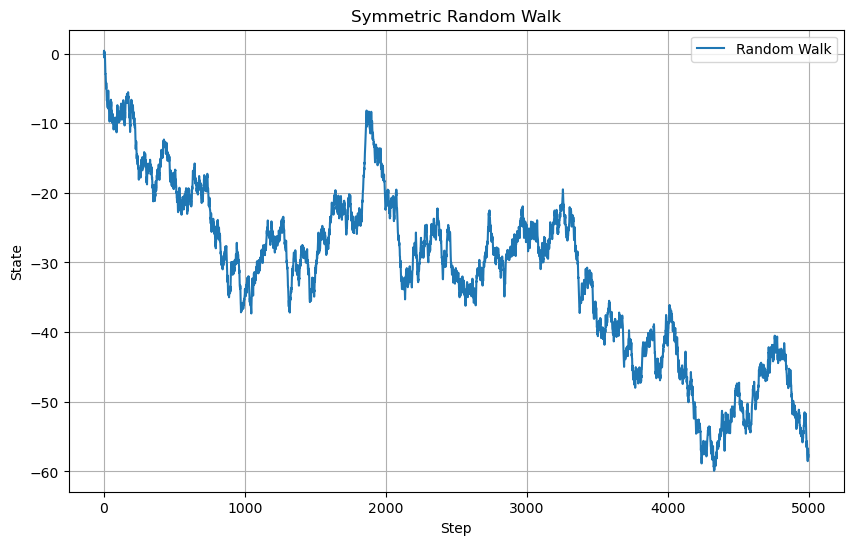

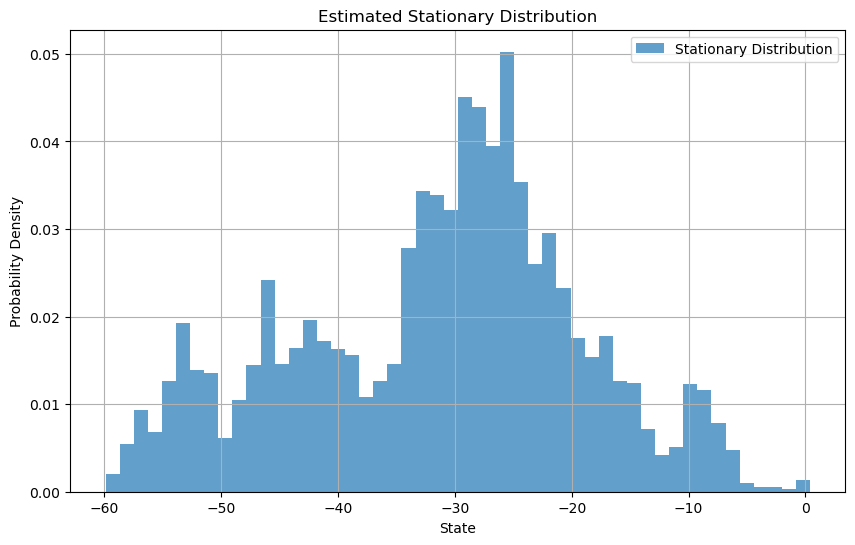

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the random walk process
def random_walk(n_steps, initial_state, step_size=1):
    """
    Simulate a symmetric random walk.
    
    Args:
        n_steps (int): Number of steps in the random walk.
        initial_state (float): Starting position of the random walk.
        step_size (float): Step size for the random walk.

    Returns:
        np.ndarray: The states visited during the random walk.
    """
    states = np.zeros(n_steps)
    states[0] = initial_state
    
    for i in range(1, n_steps):
        step = np.random.uniform(-step_size, step_size)  # Symmetric step
        states[i] = states[i-1] + step
    
    return states

# Simulate the random walk
n_steps = 5000
initial_state = 0
states = random_walk(n_steps, initial_state)

# Plot the random walk
plt.figure(figsize=(10, 6))
plt.plot(states, label="Random Walk")
plt.title("Symmetric Random Walk")
plt.xlabel("Step")
plt.ylabel("State")
plt.legend()
plt.grid()
plt.show()

# Estimate the stationary distribution
def stationary_distribution(states, bins=50):
    """
    Estimate the stationary distribution from random walk states.

    Args:
        states (np.ndarray): Array of states visited during the random walk.
        bins (int): Number of bins for histogram estimation.

    Returns:
        tuple: Histogram values and bin edges.
    """
    hist, bin_edges = np.histogram(states, bins=bins, density=True)
    return hist, bin_edges

# Compute the stationary distribution
hist, bin_edges = stationary_distribution(states)

# Plot the stationary distribution
plt.figure(figsize=(10, 6))
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
plt.bar(bin_centers, hist, width=bin_edges[1] - bin_edges[0], alpha=0.7, label="Stationary Distribution")
plt.title("Estimated Stationary Distribution")
plt.xlabel("State")
plt.ylabel("Probability Density")
plt.legend()
plt.grid()
plt.show()


In [2]:
# Function to simulate a random walk
def random_walk(n_steps, initial_state, step_size=1):
    """
    Simulate a symmetric random walk.
    
    Args:
        n_steps (int): Number of steps in the random walk.
        initial_state (float): Starting position of the random walk.
        step_size (float): Step size for the random walk.

    Returns:
        list: The states visited during the random walk.
    """
    states = [initial_state]
    for i in range(1, n_steps):
        step = (2 * random_uniform() - 1) * step_size  # Generate a symmetric step
        states.append(states[-1] + step)
    return states

# Function to generate uniform random numbers in [0, 1]
def random_uniform():
    """
    Generate a pseudo-random number between 0 and 1 using a linear congruential generator.
    
    Returns:
        float: A pseudo-random number between 0 and 1.
    """
    # Linear Congruential Generator (LCG) parameters
    a = 1103515245
    c = 12345
    m = 2**31
    global seed
    seed = (a * seed + c) % m
    return seed / m

# Function to calculate histogram
def histogram(data, bins, range_min, range_max):
    """
    Calculate a histogram for the given data.
    
    Args:
        data (list): The data to bin.
        bins (int): Number of bins.
        range_min (float): Minimum range of the data.
        range_max (float): Maximum range of the data.
    
    Returns:
        list, list: Bin counts and bin edges.
    """
    bin_edges = [range_min + i * (range_max - range_min) / bins for i in range(bins + 1)]
    bin_counts = [0] * bins
    for value in data:
        for i in range(bins):
            if bin_edges[i] <= value < bin_edges[i + 1]:
                bin_counts[i] += 1
                break
    return bin_counts, bin_edges

# Function to visualize histogram with ASCII art
def ascii_histogram(bin_counts, bin_edges):
    """
    Print a histogram using ASCII art.
    
    Args:
        bin_counts (list): The bin counts.
        bin_edges (list): The bin edges.
    """
    max_count = max(bin_counts)
    for i, count in enumerate(bin_counts):
        bar = '#' * int(50 * count / max_count)  # Scale to 50 characters
        print(f"{bin_edges[i]:.2f} - {bin_edges[i+1]:.2f}: {bar}")

# Initialize parameters and random seed
n_steps = 5000
initial_state = 0
step_size = 1
seed = 42  # Set a seed for reproducibility

# Simulate the random walk
states = random_walk(n_steps, initial_state, step_size)

# Estimate stationary distribution
bins = 20
range_min = min(states)
range_max = max(states)
bin_counts, bin_edges = histogram(states, bins, range_min, range_max)

# Print histogram
print("\nEstimated Stationary Distribution (Histogram):")
ascii_histogram(bin_counts, bin_edges)



Estimated Stationary Distribution (Histogram):
-12.08 - -9.26: #
-9.26 - -6.44: #####
-6.44 - -3.62: #######
-3.62 - -0.80: ###########
-0.80 - 2.02: ########
2.02 - 4.83: ###################
4.83 - 7.65: ########################
7.65 - 10.47: ########################
10.47 - 13.29: ##########################################
13.29 - 16.11: ##################################################
16.11 - 18.93: ##################
18.93 - 21.75: #####
21.75 - 24.57: #
24.57 - 27.39: #
27.39 - 30.20: #
30.20 - 33.02: ########
33.02 - 35.84: ############
35.84 - 38.66: #####
38.66 - 41.48: #####
41.48 - 44.30: ###


In [ ]:
### Definition 6.13 (Recurrence and Harris Recurrence)
A Markov chain is said to be recurrent if there exists an integer \( n \in \mathbb{N} \) such that \( P(X_n \in A | X_0) > 0 \) for every set \( A \) such that \( \mu(A) > 0 \), where \( \mu \) is a measure on the state space. This property ensures that most of the chains involved in MCMC algorithms are recurrent, which means that the average number of visits to an arbitrary set \( A \) is infinite. 

A Markov chain is **Harris recurrent** if, for any set \( A \), the probability of an infinite number of returns to \( A \) is 1. Harris recurrence guarantees that the chain has the same limiting behavior for **every** starting value, instead of **almost every** starting value.

This is critical in MCMC algorithms. Since most algorithms start from some arbitrary point \( X_0 \), we are effectively starting from a set of measure zero (under a continuous dominating measure). Ensuring that the chain converges from almost every starting point is insufficient; **Harris recurrence** ensures convergence from **every** starting point.

### Stationary Distribution and Limiting Distribution
The stationary distribution is a limiting distribution in the sense that the limiting distribution of \( X_{n+1} \) is the same under the total variation norm, regardless of the initial value of \( X_0 \) (see Proposition 6.48).

Stronger forms of convergence are encountered in MCMC settings, such as **geometric** and **uniform convergence** (see Definitions 6.54 and 6.58). A key consequence of this convergence is that the average

$$
\frac{1}{N} \sum_{n=1}^{N} h(X_n)
$$

converges to the expectation \( E[h(X)] \) almost surely. When the chain is **reversible** (i.e., the transition kernel is symmetric), a **Central Limit Theorem** (CLT) holds for this average.

### Minorization and Diagnostics in MCMC
In Chapter 12, diagnostics will be based on a **minorization condition**, which is the existence of a set \( C \) such that there also exists \( m \in \mathbb{N} \), \( \epsilon_m > 0 \), and a probability measure \( \nu \) such that:

$$
P(X_m \in A | X_0 \in C) \geq \epsilon_m \nu(A)
$$

This ensures that the chain visits set \( C \) frequently, and the visits can be exploited to create independent batches in the sum above. The set \( C \) is called a **small set** (Definition 6.19), and visits to this set provide independent samples that can be used in the Monte Carlo estimation.

### Statistical Connection
In the context of statistics, the **marginal distribution** of a Markov chain's state space is related to the **invariant distribution** (i.e., the stationary distribution). In particular, the invariant distribution is **positive recurrent** for chains that are recurrent and Harris recurrent.

#### Summary:
- **Recurrent chains** have infinite visits to every non-empty set \( A \) with positive measure.
- **Harris recurrent chains** ensure convergence from every initial state.
- **Stationary distribution** is the limiting distribution of the Markov chain.
- **Minorization condition** helps in creating independent samples.
- **Invariant distributions** are connected to the marginal distributions in statistical modeling.
### Convergence Conditions for Markov Chains
If the **marginals** are proper, for convergence, we only need the chain to be **aperiodic**. This condition is easy to satisfy; a sufficient condition is that \( K(x, A) > 0 \) (or equivalently \( f(n) > 0 \)) in a neighborhood of \( x \). 

However, if the marginals are not proper or do not exist, the chain cannot be **positive recurrent**. In such cases, the chain will either be **null recurrent** or **transient**, both of which are undesirable behaviors.

### 6.2 Basic Notions
A **Markov chain** is a sequence of random variables that evolve over time. The probability of transition from one state to another depends on the particular set in which the chain resides. It is mathematically cleaner to define the chain in terms of its **transition kernel**, which determines these transitions.

#### Definition 6.2 (Transition Kernel)
A **transition kernel** is a function \( K \) defined on \( X \times B(X) \), where \( X \) is the state space and \( B(X) \) is the Borel sigma-algebra, such that:

1. For all \( x \in X \), \( K(x, \cdot) \) is a probability measure.
2. For all \( A \in B(X) \), \( K(\cdot, A) \) is measurable.

In the discrete case, the transition kernel is simply a **transition matrix** \( K \) with elements:

$$ P_{xy} = P(X_n = y | X_{n-1} = x), \quad \sum_{y \in X} P_{xy} = 1. $$

In the continuous case, the kernel denotes the conditional density:

$$ P(X_n \in A | X_{n-1} = x) = \int_A K(x, x') dx'. $$

#### Example 6.3: Bernoulli-Laplace Model
Consider the state space \( \{0, 1, \ldots, M\} \) and a chain \( (X_n) \) where \( X_n \) represents the number of particles of a particular type in a tank at time \( n \). The chain evolves through exchanges of particles between two identical tanks. The transition matrix is given by:

For \( 0 \leq x, y \leq M \):

- \( P_{xy} = 0 \) if \( x \neq y \),
- \( P_{zz} = \frac{x(M-x)}{M^2} \) for \( x = y \),
- \( P_{z+1} = \frac{M(M-1)}{M^2} \),
- \( P_{01} = P_{M(M-1)} = 1 \).

This model is called the **Bernoulli-Laplace model**, and the chain is defined for \( n \in \mathbb{N} \) (the natural numbers), rather than for \( n \in \mathbb{Z} \) (the integers).

The distribution of \( X_0 \), the initial state of the chain, plays a significant role in the dynamics of the Markov chain.
### Initial Distribution and Transition of Markov Chains

The **initial distribution** of the Markov chain is denoted by \( \pi_0 = (\pi_1, \pi_2, \ldots) \), and the marginal probability distribution of \( X_1 \) is obtained from the matrix multiplication:

$$
\pi_1 = \pi_0 K,
$$

where \( K \) is the **transition matrix**. By repeated multiplication, the distribution of \( X_n \) is given by:

$$
\pi_n = \pi_0 K^n.
$$

In the **continuous case**, if \( \mu \) denotes the initial distribution of the chain, that is, if:

$$
X_0 \sim \mu,
$$

then we let \( P_n \) denote the probability distribution of \( X_n \) under this initial condition. When \( X_0 \) is fixed, especially when \( \mu \) is the Dirac mass \( \delta \), we use the alternative notation \( P_{\delta} \).

#### Definition 6.4: Markov Chain

Given a transition kernel \( K \), a sequence \( X_0, X_1, X_2, \ldots \) of random variables is a **Markov chain**, denoted by \( (X) \), if for any \( t \), the conditional distribution of \( X_{n+1} \) given \( X_0, X_1, \dots, X_n \) is the same as the distribution of \( X_{n+1} \) given only \( X_n \). Mathematically:

$$
P(X_{n+1} \in A | X_0, X_1, \dots, X_n) = P(X_{n+1} \in A | X_n) = K(X_n, A).
$$

A Markov chain is **time-homogeneous** (or simply homogeneous) if the distribution of the pair \( (X_n, X_{n+1}) \) given \( X_n = x \) is the same for all \( n \) and for all pairs of states \( x, x' \). In other words, the transition kernel \( K \) is independent of time.

$$
P(X_{n+1} \in A | X_n = x) = K(x, A), \quad \forall n, x, A.
$$

Thus, if the initial distribution \( X_0 \) is known, the construction of the Markov chain \( (X_n) \) is entirely determined by its transition kernel \( K \), i.e., by the distribution of \( X_{n+1} \) conditioned on \( X_n \).

### Example 6.5: Simulated Annealing

In **simulated annealing**, the Markov chain is used to find the global minimum of an energy function \( E(x) \) defined over a finite state-space \( \mathcal{X} = \{1, 2, \dots, K\} \). The algorithm generates a sequence of states \( X_0, X_1, X_2, \dots \), where at each step the chain transitions according to the following rule:

- **Conditioned on** \( X_n \), the next state \( Y \) is generated from a fixed probability distribution \( P(Y | X_n) \), typically involving the current state and the temperature \( T_n \).
- The new value of the chain is then determined based on this distribution.

This Markov chain is often **non-homogeneous** when implemented with a time-varying temperature, but it is commonly studied as if it were time-homogeneous for simplicity in theoretical analyses.


In [5]:
import math
import random
import random

# Define a simple Markov chain with a transition matrix
class MarkovChain:
    def __init__(self, states, transition_matrix):
        self.states = states
        self.transition_matrix = transition_matrix
        self.current_state = random.choice(states)

    def transition(self):
        # Get the current state's index in the state space
        state_index = self.states.index(self.current_state)
        
        # Get the transition probabilities for the current state
        transition_probabilities = self.transition_matrix[state_index]
        
        # Choose the next state based on the transition probabilities
        self.current_state = random.choices(self.states, transition_probabilities)[0]
        return self.current_state

# Example state space and transition matrix for a simple random walk
states = [0, 1, 2]  # Discrete states
transition_matrix = [
    [0.5, 0.5, 0],  # From state 0 to 0 with 50% probability, to state 1 with 50%
    [0.3, 0.4, 0.3], # From state 1 to 0, 1, or 2 with specified probabilities
    [0, 0.6, 0.4],   # From state 2 to 1 with 60%, to state 2 with 40%
]

# Initialize the Markov chain
markov_chain = MarkovChain(states, transition_matrix)

# Run the Markov chain for 10 steps
steps = 10
print("Starting state:", markov_chain.current_state)
for i in range(steps):
    new_state = markov_chain.transition()
    print(f"Step {i+1}: {new_state}")

class SimulatedAnnealing:
    def __init__(self, initial_state, energy_function, temperature_schedule, state_space):
        self.state = initial_state
        self.energy_function = energy_function
        self.temperature_schedule = temperature_schedule
        self.state_space = state_space

    def accept_move(self, next_state, temperature):
        # Calculate energy difference
        energy_diff = self.energy_function(next_state) - self.energy_function(self.state)
        
        # If the energy decreases, accept the move
        if energy_diff < 0:
            return True
        # If the energy increases, accept the move with a certain probability
        else:
            acceptance_prob = math.exp(-energy_diff / temperature)
            return random.random() < acceptance_prob

    def run(self, num_iterations):
        for i in range(num_iterations):
            temperature = self.temperature_schedule(i)
            
            # Generate a new candidate state
            next_state = random.choice(self.state_space)
            
            # Decide whether to accept the new state
            if self.accept_move(next_state, temperature):
                self.state = next_state

            print(f"Iteration {i+1}: State = {self.state}, Energy = {self.energy_function(self.state)}")

# Define the energy function for Simulated Annealing (e.g., a simple quadratic function)
def energy_function(state):
    return state**2  # Minimize the square of the state

# Temperature schedule (decay over time)
def temperature_schedule(iteration):
    return 1000 / (1 + iteration)

# Define the state space (for example, states are integers from -10 to 10)
state_space = list(range(-10, 11))

# Initialize Simulated Annealing
initial_state = random.choice(state_space)
sa = SimulatedAnnealing(initial_state, energy_function, temperature_schedule, state_space)

# Run the Simulated Annealing algorithm for 100 iterations
sa.run(100)


Starting state: 1
Step 1: 0
Step 2: 0
Step 3: 0
Step 4: 0
Step 5: 0
Step 6: 0
Step 7: 0
Step 8: 0
Step 9: 1
Step 10: 2
Iteration 1: State = 4, Energy = 16
Iteration 2: State = 8, Energy = 64
Iteration 3: State = -2, Energy = 4
Iteration 4: State = 1, Energy = 1
Iteration 5: State = 1, Energy = 1
Iteration 6: State = -6, Energy = 36
Iteration 7: State = -9, Energy = 81
Iteration 8: State = -4, Energy = 16
Iteration 9: State = -7, Energy = 49
Iteration 10: State = -8, Energy = 64
Iteration 11: State = -1, Energy = 1
Iteration 12: State = 4, Energy = 16
Iteration 13: State = 8, Energy = 64
Iteration 14: State = -8, Energy = 64
Iteration 15: State = 3, Energy = 9
Iteration 16: State = -8, Energy = 64
Iteration 17: State = -4, Energy = 16
Iteration 18: State = -1, Energy = 1
Iteration 19: State = -1, Energy = 1
Iteration 20: State = 0, Energy = 0
Iteration 21: State = 4, Energy = 16
Iteration 22: State = 4, Energy = 16
Iteration 23: State = 7, Energy = 49
Iteration 24: State = 2, Energy = 4

# Markov Chains and Transition Kernels

## Transition Probability in Markov Chains
The update rule for a Markov chain can be expressed as:
$$
X_{n+1} =
\begin{cases} 
Y & \text{with probability } \exp\left(\frac{E(Y) - E(X)}{T}\right), \\
X_n & \text{otherwise}.
\end{cases}
$$
If the temperature \( T \) depends on \( n \), the chain becomes time heterogeneous.

---

## Example 6.6: AR(1) Models
AR(1) models illustrate Markov chains in continuous state spaces. For an AR(1) process:
$$
X_n = \phi X_{n-1} + \epsilon_n, \quad \epsilon_n \sim \mathcal{N}(0, \sigma^2),
$$
where \( \epsilon_n \) are independent. The process satisfies the Markov property because \( X_n \) depends only on \( X_{n-1} \) and not on \( X_{n-2}, X_{n-3}, \ldots \), given \( X_{n-1} \).

For higher-order processes, like AR(q), the Markovian property can be derived by considering the vector:
$$
(X_n, X_{n-1}, \ldots, X_{n-q+1}).
$$
However, ARMA(p, q) models do not fit within the Markovian framework (see Problem 6.3).

---

## Transition Kernels and Convolution
In the general case, the kernel \( K \) determines the properties of the Markov chain \( (X_n) \). The relationships are as follows:
1. For a single transition:
   $$
   P(X_1 \in A_1) = K(x, A_1).
   $$

2. For two transitions:
   $$
   P((X_1, X_2) \in A_1 \times A_2) = \int_{A_1} K(x, dy_1) K(y_1, A_2).
   $$

3. For \( n \)-step transitions:
   $$
   P((X_1, \ldots, X_n) \in A_1 \times \cdots \times A_n) = \int_{A_1} K(x, dy_1) \int_{A_2} K(y_1, dy_2) \cdots \int_{A_n} K(y_{n-1}, A_n).
   $$

---

### Conditional Distributions
The kernel \( K(x, dy) \) represents the conditional distribution of \( X_{n+1} \) given \( X_n \):
$$
P(X_{n+1} \in A | X_n = x) = K(x, A).
$$
This formulation simplifies the construction of Markov chains, avoiding concerns about different versions of conditional probabilities.

---

### Chapman-Kolmogorov Equations
For \( n > 1 \), the kernel for \( n \)-step transitions is:
$$
K^n(z, A) = \int K^{n-1}(y, A) K(z, dy).
$$
The Chapman-Kolmogorov equation relates multi-step kernels:
$$
K^{m+n}(z, A) = \int K^m(y, A) K^n(z, dy).
$$
# Chapman-Kolmogorov Equations and Resolvents

## Lemma 6.7: Chapman-Kolmogorov Equations
For every \( (m, n) \in \mathbb{N}^2 \), \( x \in \mathcal{X} \), and \( A \in \mathcal{B}(\mathcal{X}) \):
$$
K^{m+n}(x, A) = \int_\mathcal{X} K^n(u, A) K^m(x, du).
$$

In informal terms, the Chapman-Kolmogorov equations state that to transition from \( x \) to \( A \) in \( m+n \) steps, the process must pass through some \( y \) at step \( n \).

---

### Discrete Case
In the discrete case, this equation is interpreted as a matrix product and directly follows from:
$$
P(X_{n+m} \in A) = \sum_{y \in \mathcal{X}} P(X_n = y) P(X_m \in A | X_n = y).
$$

---

### General Case
In the general case, \( K \) is viewed as an operator on the space of integrable functions. For \( h \in L^1(\mathcal{X}) \):
$$
Kh(x) = \int_\mathcal{X} h(y) K(x, dy).
$$
Here, \( K^n \) represents the \( n \)-fold composition of \( K \):
$$
K^n = K \circ K^{n-1}.
$$

---

## Definition 6.8: Resolvents
A resolvent associated with the kernel \( K \) is a kernel of the form:
$$
K_\varepsilon(x, A) = (1 - \varepsilon) \sum_{i=0}^\infty \varepsilon^i K^i(x, A), \quad 0 < \varepsilon < 1.
$$

### \( K_\varepsilon \)-Chains
A Markov chain with kernel \( K_\varepsilon \) is called a \( K_\varepsilon \)-chain. Given an initial distribution, the \( K_\varepsilon \)-chain corresponds to a subchain of the original chain \( (X_n) \), where the indices in the subchain are generated by a geometric distribution with parameter \( 1 - \varepsilon \). The resulting Markov chain enjoys stronger regularity properties, which are useful for analyzing the original chain.

---

## Proposition 6.9: Weak Markov Property
The weak Markov property states:
$$
\mathbb{E}_\mu[h(X_{n+1}, X_{n+2}, \ldots) | X_0, \ldots, X_n] = \mathbb{E}_{X_n}[h(X_1, X_2, \ldots)],
$$
provided the expectations exist.

### Indicator Functions
If \( h \) is an indicator function, this reduces to the classical Markov property. However, the formulation can be extended to more general functions, making it particularly useful for:
- Stopping time analysis
- Convergence assessment of Markov chain Monte Carlo (MCMC) algorithms (as discussed in Chapter 12).
# Stopping Times and Strong Markov Property

## Definition 6.10: Stopping Time
Consider \( A \in \mathcal{B}(\mathcal{X}) \). The **stopping time** at \( A \), denoted by \( T_A \), is defined as:
$$
T_A = \inf\{n \geq 1 : X_n \in A\},
$$
where \( T_A = +\infty \) if \( X_n \notin A \) for every \( n \).

### Stopping Rule
A function \( \tau: \{1, 2, \ldots\} \to \mathbb{N} \cup \{+\infty\} \) is called a **stopping rule** if the set \( \{\tau \leq n\} \) is measurable with respect to the \( \sigma \)-algebra generated by \( (X_0, \ldots, X_n) \).

---

### Number of Passages in \( A \)
Associated with the set \( A \), the **number of passages** of \( (X_n) \) in \( A \), denoted \( \Pi_A \), is defined as:
$$
\Pi_A = \sum_{n=1}^\infty \mathbf{1}_A(X_n),
$$
where \( \mathbf{1}_A(X_n) \) is the indicator function that \( X_n \in A \).

---

### Key Quantities
- \( \mathbb{E}[T_A] \): The average number of steps to enter \( A \).
- \( \mathbb{P}(T_A < \infty) \): The probability of return to \( A \) in a finite number of steps.

For stopping times of the form given by \( T_A \), \( T_A \) takes the value \( n \) when none of \( X_0, X_1, \ldots, X_{n-1} \) are in \( A \), but \( X_n \) is.

---

## Proposition 6.11: Strong Markov Property
For every initial distribution \( \mu \) and every stopping time \( \tau \) which is almost surely finite:
$$
\mathbb{E}[h(X_{\tau+1}, X_{\tau+2}, \ldots) | X_0, \ldots, X_\tau] = \mathbb{E}_{X_\tau}[h(X_1, X_2, \ldots)],
$$
provided the expectations exist.

This allows conditioning on a random number of steps while preserving the fundamental properties of a Markov chain.

---

## Example 6.12: Coin Tossing Game
Consider a coin tossing game with the following setup:
- Player \( b \) gains \( +1 \) for heads and loses \( -1 \) for tails.
- Player \( c \) gains \( +1 \) for tails.
- Let \( X_n \) represent the sum of gains for player \( b \) after \( n \) rounds.

### Transition Matrix
The transition matrix \( P \) is an infinite-dimensional matrix with upper and lower subdiagonals equal to \( 1/2 \).

---

### Return Times
Define the following stopping times:
1. \( T_1 = \inf\{n : X_n = 0\} \)  
   (The first return to the origin.)
2. \( T_2 = \inf\{n : X_n \leq -B\} \)  
   (The ruin time for player \( b \).)
3. \( T_3 = \inf\{n : X_n \geq C\} \)  
   (The ruin time for player \( c \).)

The probability of ruin for player \( b \) is:
$$
\mathbb{P}(T_2 < T_3).
$$

---

### Reference
Feller (1970, Chapter III) provides a detailed analysis of this coin tossing game.


In [7]:
import numpy as np

# Transition matrix for coin-toss example
def create_transition_matrix(states):
    """
    Creates a transition matrix for a coin-toss game where the state can go up or down by 1.
    """
    size = len(states)
    P = np.zeros((size, size))

    for i in range(size):
        if i > 0:
            P[i, i - 1] = 0.5  # Probability to go down by 1
        if i < size - 1:
            P[i, i + 1] = 0.5  # Probability to go up by 1

    # Normalize rows to ensure each row sums to 1
    for i in range(size):
        P[i] /= np.sum(P[i])

    return P


# Simulating a Markov chain
def simulate_markov_chain(P, initial_state, steps):
    """
    Simulates a Markov chain given the transition matrix P, initial state, and number of steps.
    """
    n_states = P.shape[0]
    state = initial_state
    states = [state]

    for _ in range(steps):
        state = np.random.choice(range(n_states), p=P[state])
        states.append(state)

    return states

# Compute stopping time
def compute_stopping_time(states, target_set):
    """
    Computes the stopping time for the chain to enter the target set.
    """
    for i, state in enumerate(states):
        if state in target_set:
            return i
    return float('inf')

# Coin tossing example
def coin_tossing_example(B, C, steps=1000):
    """
    Simulates a coin tossing game with given initial dollars B and C for two players.
    Returns stopping times and probability of ruin for player B.
    """
    # Define state space and transition matrix
    states = np.arange(-B, C + 1)
    P = create_transition_matrix(states)

    # Initial state
    initial_state = B  # Player B starts with B dollars

    # Simulate the chain
    simulated_chain = simulate_markov_chain(P, initial_state, steps)

    # Compute stopping times
    T1 = compute_stopping_time(simulated_chain, {0})  # First return to null
    T2 = compute_stopping_time(simulated_chain, {-B})  # Player B goes bankrupt
    T3 = compute_stopping_time(simulated_chain, {C})   # Player C goes bankrupt

    # Probability of ruin
    ruin_probability = T2 < T3

    return T1, T2, T3, ruin_probability

# Example Usage
if __name__ == "__main__":
    B = 5  # Initial dollars for Player B
    C = 5  # Initial dollars for Player C
    steps = 1000

    T1, T2, T3, ruin_probability = coin_tossing_example(B, C, steps)

    print(f"Stopping Time T1 (return to 0): {T1}")
    print(f"Stopping Time T2 (Player B bankrupt): {T2}")
    print(f"Stopping Time T3 (Player C bankrupt): {T3}")
    print(f"Probability of ruin for Player B: {ruin_probability}")


Stopping Time T1 (return to 0): 19
Stopping Time T2 (Player B bankrupt): inf
Stopping Time T3 (Player C bankrupt): 0
Probability of ruin for Player B: False


In [8]:
import random

def create_transition_matrix(states):
    """
    Creates a transition matrix for a coin-toss game where the state can go up or down by 1.
    """
    size = len(states)
    P = {}

    for i in range(size):
        state = states[i]
        P[state] = {}

        if i > 0:
            P[state][states[i - 1]] = 0.5  # Probability to go down by 1
        if i < size - 1:
            P[state][states[i + 1]] = 0.5  # Probability to go up by 1

        # Normalize probabilities to ensure they sum to 1
        total_prob = sum(P[state].values())
        for key in P[state]:
            P[state][key] /= total_prob

    return P


def simulate_markov_chain(P, initial_state, steps):
    """
    Simulates a Markov chain given the transition matrix P, initial state, and number of steps.
    """
    state = initial_state
    states = [state]

    for _ in range(steps):
        next_states = P[state]
        state = random.choices(list(next_states.keys()), weights=next_states.values())[0]
        states.append(state)

    return states


def compute_stopping_time(states, target_set):
    """
    Computes the stopping time for the chain to enter the target set.
    """
    for i, state in enumerate(states):
        if state in target_set:
            return i
    return float('inf')


def coin_tossing_example(B, C, steps=1000):
    """
    Simulates a coin tossing game with given initial dollars B and C for two players.
    Returns stopping times and probability of ruin for player B.
    """
    # Define state space and transition matrix
    states = list(range(-B, C + 1))
    P = create_transition_matrix(states)

    # Initial state
    initial_state = 0  # Player B starts at neutral (0 dollars in gains/losses)

    # Simulate the chain
    simulated_chain = simulate_markov_chain(P, initial_state, steps)

    # Compute stopping times
    T1 = compute_stopping_time(simulated_chain, {0})  # First return to null
    T2 = compute_stopping_time(simulated_chain, {-B})  # Player B goes bankrupt
    T3 = compute_stopping_time(simulated_chain, {C})   # Player C goes bankrupt

    # Probability of ruin
    ruin_probability = T2 < T3

    return T1, T2, T3, ruin_probability


# Example Usage
if __name__ == "__main__":
    B = 5  # Initial dollars for Player B
    C = 5  # Initial dollars for Player C
    steps = 1000

    T1, T2, T3, ruin_probability = coin_tossing_example(B, C, steps)

    print(f"Stopping Time T1 (return to 0): {T1}")
    print(f"Stopping Time T2 (Player B bankrupt): {T2}")
    print(f"Stopping Time T3 (Player C bankrupt): {T3}")
    print(f"Probability of ruin for Player B: {ruin_probability}")


Stopping Time T1 (return to 0): 0
Stopping Time T2 (Player B bankrupt): 19
Stopping Time T3 (Player C bankrupt): 49
Probability of ruin for Player B: True


Stopping Time T1 (return to 0): 0
Stopping Time T2 (Player B bankrupt): 99
Stopping Time T3 (Player C bankrupt): 15
Probability of ruin for Player B: False


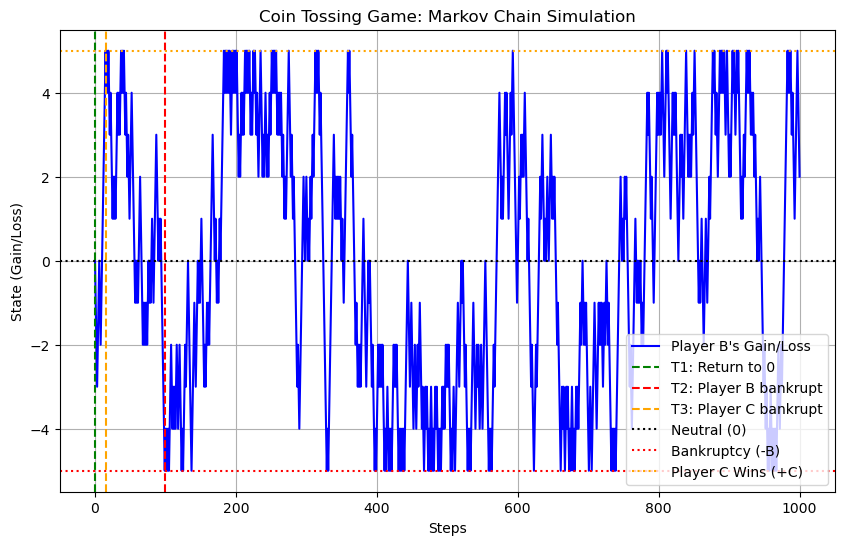

In [9]:
import random
import matplotlib.pyplot as plt

def create_transition_matrix(states):
    """
    Creates a transition matrix for a coin-toss game where the state can go up or down by 1.
    """
    size = len(states)
    P = {}

    for i in range(size):
        state = states[i]
        P[state] = {}

        if i > 0:
            P[state][states[i - 1]] = 0.5  # Probability to go down by 1
        if i < size - 1:
            P[state][states[i + 1]] = 0.5  # Probability to go up by 1

        # Normalize probabilities to ensure they sum to 1
        total_prob = sum(P[state].values())
        for key in P[state]:
            P[state][key] /= total_prob

    return P


def simulate_markov_chain(P, initial_state, steps):
    """
    Simulates a Markov chain given the transition matrix P, initial state, and number of steps.
    """
    state = initial_state
    states = [state]

    for _ in range(steps):
        next_states = P[state]
        state = random.choices(list(next_states.keys()), weights=next_states.values())[0]
        states.append(state)

    return states


def compute_stopping_time(states, target_set):
    """
    Computes the stopping time for the chain to enter the target set.
    """
    for i, state in enumerate(states):
        if state in target_set:
            return i
    return float('inf')


def coin_tossing_example(B, C, steps=1000):
    """
    Simulates a coin tossing game with given initial dollars B and C for two players.
    Returns stopping times and probability of ruin for player B.
    """
    # Define state space and transition matrix
    states = list(range(-B, C + 1))
    P = create_transition_matrix(states)

    # Initial state
    initial_state = 0  # Player B starts at neutral (0 dollars in gains/losses)

    # Simulate the chain
    simulated_chain = simulate_markov_chain(P, initial_state, steps)

    # Compute stopping times
    T1 = compute_stopping_time(simulated_chain, {0})  # First return to null
    T2 = compute_stopping_time(simulated_chain, {-B})  # Player B goes bankrupt
    T3 = compute_stopping_time(simulated_chain, {C})   # Player C goes bankrupt

    # Probability of ruin
    ruin_probability = T2 < T3

    return simulated_chain, T1, T2, T3, ruin_probability


def plot_results(simulated_chain, T1, T2, T3, B, C):
    """
    Plots the trajectory of the simulated chain and highlights stopping times.
    """
    steps = list(range(len(simulated_chain)))
    
    plt.figure(figsize=(10, 6))
    plt.plot(steps, simulated_chain, label="Player B's Gain/Loss", color="blue")
    
    # Highlight stopping times
    if T1 != float('inf'):
        plt.axvline(x=T1, color="green", linestyle="--", label="T1: Return to 0")
    if T2 != float('inf'):
        plt.axvline(x=T2, color="red", linestyle="--", label="T2: Player B bankrupt")
    if T3 != float('inf'):
        plt.axvline(x=T3, color="orange", linestyle="--", label="T3: Player C bankrupt")
    
    plt.axhline(y=0, color="black", linestyle=":", label="Neutral (0)")
    plt.axhline(y=-B, color="red", linestyle=":", label=f"Bankruptcy (-B)")
    plt.axhline(y=C, color="orange", linestyle=":", label=f"Player C Wins (+C)")
    
    plt.xlabel("Steps")
    plt.ylabel("State (Gain/Loss)")
    plt.title("Coin Tossing Game: Markov Chain Simulation")
    plt.legend()
    plt.grid(True)
    plt.show()


# Example Usage
if __name__ == "__main__":
    B = 5  # Initial dollars for Player B
    C = 5  # Initial dollars for Player C
    steps = 1000

    simulated_chain, T1, T2, T3, ruin_probability = coin_tossing_example(B, C, steps)

    print(f"Stopping Time T1 (return to 0): {T1}")
    print(f"Stopping Time T2 (Player B bankrupt): {T2}")
    print(f"Stopping Time T3 (Player C bankrupt): {T3}")
    print(f"Probability of ruin for Player B: {ruin_probability}")

    plot_results(simulated_chain, T1, T2, T3, B, C)


## 6.3 Irreducibility, Atoms, and Small Sets

### 6.3.1 Irreducibility

The property of irreducibility is a measure of the sensitivity of a Markov chain to its initial conditions. It is crucial for Markov Chain Monte Carlo (MCMC) algorithms because it guarantees convergence, avoiding the need for a detailed analysis of the transition operator to specify "acceptable" initial conditions.

In the discrete case, a chain is irreducible if all states communicate, which means:

$$
P_x(T_y < \infty) > 0,
$$

where \( T_y \) is the first time state \( y \) is visited, as defined in (6.7). In many cases, \( P_x(T_y < \infty) \) is uniformly equal to zero, requiring the introduction of an auxiliary measure on \( \mathcal{B}(X) \) to correctly define irreducibility.

#### Definition 6.13: \( \psi \)-Irreducibility

Given a measure \( \psi \), the Markov chain \( (X_n) \) with transition kernel \( K(x, y) \) is \( \psi \)-irreducible if, for every \( A \in \mathcal{B}(X) \) with \( \psi(A) > 0 \), there exists \( n \) such that:

$$
K^n(x, A) > 0 \quad \text{for all } x \in X,
$$

or equivalently:

$$
P_x(T_A < \infty) > 0.
$$

The chain is strongly \( \psi \)-irreducible if \( n = 1 \) for all measurable \( A \).

#### Example 6.14: Bernoulli-Laplace Model

In the Bernoulli-Laplace model, the chain is finite and irreducible since it is possible to connect the states \( x \) and \( y \) in \( T_y \) steps with probability:

$$
P_x(T_y < \infty) = \prod_{i = x}^{y} \frac{1}{2}.
$$

#### Theorem 6.15: Equivalent Definitions of Irreducibility

The chain \( (X_n) \) is \( \psi \)-irreducible if and only if for every \( x \in X \) and every \( A \in \mathcal{B}(X) \) such that \( \psi(A) > 0 \), one of the following properties holds:

1. There exists \( n \in \mathbb{N} \) such that:

   $$
   K^n(x, A) > 0.
   $$

2. \( P_x(A) > 0 \).
3. \( K_\varepsilon(x, A) > 0 \) for some \( 0 < \varepsilon < 1 \).

The introduction of the \( K_\varepsilon \)-chain allows for the creation of a strictly positive kernel in the case of a \( \psi \)-irreducible chain, simplifying proofs. Moreover, the measure \( \psi \) in Definition 6.13 plays no crucial role, as irreducibility is an intrinsic property of \( (X_n) \) and does not rely on \( \psi \).

#### Theorem: Maximal Irreducibility Measure

(Details on this theorem will depend on the further content.)
## Theorem 6.16: Maximal Irreducibility Measure

If \( (X_n) \) is \( \psi \)-irreducible, there exists a probability measure \( \phi \) such that:

1. The Markov chain \( (X_n) \) is \( \phi \)-irreducible.
2. If there exists a measure \( \mu \) dominated by \( \phi \) (i.e., \( \mu \ll \phi \)), then:
   $$
   \phi(\{y; P_y(T_A < \infty) > 0\}) = 0.
   $$
3. If \( \phi(A) = 0 \), then \( \mu(A) = 0 \).
4. The measure \( \phi \) is equivalent to:
   $$
   \phi(A) = \int K^{1/2}(x, A) \, d\mu(x), \quad \forall A \in \mathcal{B}(X).
   $$

This theorem provides a constructive method to determine the maximal irreducibility measure through a candidate measure, which still needs to be defined.

### Example 6.17: Continuation of Example 6.6

When \( X_{n+1} = \alpha X_n + \epsilon_{n+1} \) and \( \epsilon_n \) are independent normal variables, the chain is irreducible with the reference measure being the Lebesgue measure \( \lambda \). Specifically:

$$
K(x, A) > 0 \quad \forall x \in \mathbb{R}, \, A \in \mathcal{B}(X), \, \lambda(A) > 0.
$$

On the other hand, if \( \epsilon_n \) is uniform on \([1, 1]\) and \( |\alpha| > 1 \), the chain is no longer irreducible. For instance, if \( \alpha > 1 \), then:

$$
X_{n+1} - X_n = (\alpha - 1) X_n + \epsilon_{n+1},
$$

where \( X_n > 1 / (\alpha - 1) \). The chain becomes monotonically increasing and cannot visit previous values.

---

## 6.3.2 Atoms and Small Sets

In the discrete case, the transition kernel is necessarily atomic, meaning there exist points in the state-space with positive mass. This notion is extended to the general case by Nummelin (1978), enabling precise control of the chain similar to the discrete case.

### Definition 6.18: Atom of a Markov Chain

The Markov chain \( (X_n) \) has an atom \( a \in \mathcal{B}(X) \) if there exists an associated nonzero measure \( \nu \) such that:

$$
K(x, A) = \nu(A), \quad \forall x \in a, \, A \in \mathcal{B}(X).
$$

If \( (X_n) \) is irreducible, the atom is accessible when \( \nu(a) > 0 \).
## Minorizing Condition and Small Sets

While the notion of irreducibility applies trivially to every possible value of \( X \) in the discrete case, it is often too strong for use in the continuous case. This is because it implies that the transition kernel is constant on a set of positive measure. A more general and powerful concept is the **minorizing condition**, which is defined as follows:

### Minorizing Condition

There exists a set \( C \in \mathcal{B}(X) \), a constant \( \epsilon > 0 \), and a probability measure \( \nu \) such that:

$$
K(x, A) \geq \epsilon \nu(A), \quad \forall x \in C, \, \forall A \in \mathcal{B}(X). \tag{6.10}
$$

The probability measure \( \nu \) acts as a constant component of the transition kernel on \( C \). This condition leads to the following important definition, which is essential in renewal theory and proof techniques.

---

### Definition 6.19: Small Set

A set \( C \) is **small** if there exists \( m \in \mathbb{N} \) and a nonzero measure \( \nu_m \) such that:

$$
K^m(x, A) \geq \nu_m(A), \quad \forall x \in C, \, \forall A \in \mathcal{B}(X). \tag{6.11}
$$

---

### Example 6.20: Continuation of Example 6.17

Since \( X_{n+1} \sim \mathcal{N}(\alpha X_n, \sigma^2) \), the transition kernel is bounded from below as follows:

- For \( x > \alpha w \):
  $$
  K(x, A) \geq \frac{1}{\sqrt{2\pi \sigma^2}} \exp\left(-\frac{(x - \alpha w)^2}{2\sigma^2}\right).
  $$

- For \( x < \alpha w \):
  $$
  K(x, A) \geq \frac{1}{\sqrt{2\pi \sigma^2}} \exp\left(-\frac{(x - \alpha w)^2}{2\sigma^2}\right).
  $$

Here, the set \( C = [w, w] \) is a **small set**, as the measure \( \nu_1 \) with density:

$$
\nu_1(x) = \begin{cases} 
\frac{\exp\left(-\frac{(x - \alpha w)^2}{2\sigma^2}\right)}{\sqrt{2\pi \sigma^2}} & x > \alpha w, \\
\frac{\exp\left(-\frac{(x - \alpha w)^2}{2\sigma^2}\right)}{\sqrt{2\pi \sigma^2}} & x < \alpha w, 
\end{cases}
$$

satisfies \( (6.11) \) with \( m = 1 \).

---

### Theorem 6.21: Connection Between Small Sets and Irreducibility

Let \( (X_n) \) be a \( \psi \)-irreducible chain. For every set \( A \in \mathcal{B}(X) \) such that \( \psi(A) > 0 \), there exist \( m \in \mathbb{N} \) and a small set \( C \subseteq A \) such that the associated minorizing measure satisfies:

$$
\nu_m(C) > 0.
$$

Moreover, \( X \) can be decomposed into a countable partition of small sets.


In [10]:
import numpy as np

# Define the transition matrix for a Markov chain
# Transition matrix P, where P[i, j] is the probability of moving from state i to state j
P = np.array([
    [0.5, 0.5, 0.0],
    [0.2, 0.8, 0.0],
    [0.0, 0.0, 1.0]
])

# Function to check for irreducibility
def is_irreducible(P):
    n = P.shape[0]
    # Start with the transition matrix and square it repeatedly (powers of the matrix)
    reachability = np.linalg.matrix_power(P, n-1)
    
    # If all entries in reachability matrix are positive, the chain is irreducible
    return np.all(reachability > 0)

# Test the irreducibility of the Markov chain
if is_irreducible(P):
    print("The Markov chain is irreducible.")
else:
    print("The Markov chain is not irreducible.")

# Simulate the Markov chain
def simulate_markov_chain(P, initial_state, steps=10):
    state = initial_state
    states = [state]
    
    for _ in range(steps):
        state = np.random.choice(len(P), p=P[state])
        states.append(state)
    
    return states

# Simulate the chain for 10 steps starting from state 0
initial_state = 0
steps = 10
states_visited = simulate_markov_chain(P, initial_state, steps)
print(f"States visited during simulation: {states_visited}")


The Markov chain is not irreducible.
States visited during simulation: [0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1]


In [11]:
import random

# Define the transition matrix for a Markov chain
P = {
    0: {0: 0.5, 1: 0.5, 2: 0.0},
    1: {0: 0.2, 1: 0.8, 2: 0.0},
    2: {0: 0.0, 1: 0.0, 2: 1.0}
}

# Function to check for irreducibility
def is_irreducible(P):
    # Number of states
    n = len(P)
    
    # Start with a reachability matrix (list of lists)
    reachability = [[False] * n for _ in range(n)]
    
    # If there's a non-zero transition from state i to state j, mark it as reachable
    for i in P:
        for j in P[i]:
            if P[i][j] > 0:
                reachability[i][j] = True
    
    # Now use a basic reachability algorithm (Floyd-Warshall-like)
    for k in range(n):
        for i in range(n):
            for j in range(n):
                reachability[i][j] = reachability[i][j] or (reachability[i][k] and reachability[k][j])
    
    # If all pairs of states are reachable, the chain is irreducible
    for i in range(n):
        for j in range(n):
            if not reachability[i][j]:
                return False
    return True

# Test the irreducibility of the Markov chain
if is_irreducible(P):
    print("The Markov chain is irreducible.")
else:
    print("The Markov chain is not irreducible.")

# Simulate the Markov chain
def simulate_markov_chain(P, initial_state, steps=10):
    state = initial_state
    states = [state]
    
    for _ in range(steps):
        next_state = random.choices(list(P[state].keys()), list(P[state].values()))[0]
        states.append(next_state)
        state = next_state
    
    return states

# Simulate the chain for 10 steps starting from state 0
initial_state = 0
steps = 10
states_visited = simulate_markov_chain(P, initial_state, steps)
print(f"States visited during simulation: {states_visited}")


The Markov chain is not irreducible.
States visited during simulation: [0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0]
